## RBI Banking Stress Analysis
##### Loading raw dataset

In [2]:
import pandas as pd

file_path = r"../data/Gross and Net NPAs of Scheduled Commercial Banks - Bank Group-Wise.xlsx"

raw_df = pd.read_excel(file_path, header=None)

raw_df.head(20)

d:\Deepa\ML_Project\ML_Project_2\.myvenv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Gross and Net NPAs of Scheduled Commercial Ban...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,(₹ Crores),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Scheduled Commercial Banks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Year (end-March),Advances,NaN,Non-Performing Assets (NPAs),NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Gross,Net,Gross,NaN,NaN,Net,NaN,NaN
9,NaN,NaN,NaN,NaN,Amount,As Percentage of Gross Advances,As Percentage of Total Assets,Amount,As Percentage of Net Advances,As Percentage of Total Assets


In [3]:
raw_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       0 non-null      float64
 1   1       158 non-null    object 
 2   2       153 non-null    object 
 3   3       147 non-null    object 
 4   4       159 non-null    object 
 5   5       147 non-null    object 
 6   6       147 non-null    object 
 7   7       153 non-null    object 
 8   8       147 non-null    object 
 9   9       147 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.1+ KB


In [4]:
raw_df = raw_df.drop(raw_df.columns[0], axis=1)

In [5]:
raw_df = raw_df.dropna(how='all').reset_index(drop=True)

In [6]:
raw_df = raw_df.iloc[2:].reset_index(drop=True)

In [7]:
raw_df.head(20)

,1,2,3,4,5,6,7,8,9
0,Scheduled Commercial Banks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year (end-March),Advances,NaN,Non-Performing Assets (NPAs),NaN,NaN,NaN,NaN,NaN
2,NaN,Gross,Net,Gross,NaN,NaN,Net,NaN,NaN
3,NaN,NaN,NaN,Amount,As Percentage of Gross Advances,As Percentage of Total Assets,Amount,As Percentage of Net Advances,As Percentage of Total Assets
4,1,2,3,4,5,6,7,8,9
5,2023-24,17508589.83,17142339.56,480818.2938,2.746185,1.7,106732.3205,0.622624,0.4
6,2022-23,14756637.36,14319352.43,571545.5407,3.873142,2.4,135319.7062,0.945013,0.6
7,2021-22,12750005.88,12198767.37,743639.6871,5.832465,3.4,204230.9038,1.674193,0.9
8,2020-21,11399608,10806381,835138,7.3,4.3,258050,2.4,1.3
9,2019-20,10918918,10301897,899803,8.2,5,289370,2.8,1.6


In [8]:
bank_start_rows = raw_df[
    raw_df.iloc[:, 1:].isna().all(axis=1)
].index.tolist()

bank_start_rows

[0, 33, 66, 71, 72, 90, 123, 156, 167]

In [9]:
raw_df.head()

,1,2,3,4,5,6,7,8,9
0,Scheduled Commercial Banks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year (end-March),Advances,NaN,Non-Performing Assets (NPAs),NaN,NaN,NaN,NaN,NaN
2,NaN,Gross,Net,Gross,NaN,NaN,Net,NaN,NaN
3,NaN,NaN,NaN,Amount,As Percentage of Gross Advances,As Percentage of Total Assets,Amount,As Percentage of Net Advances,As Percentage of Total Assets
4,1,2,3,4,5,6,7,8,9


In [10]:
raw_df = raw_df[
    ~raw_df.iloc[:, 0].astype(str).str.contains("Notes", na=False)
]

In [11]:
for i in bank_start_rows:
    print(i, "->", raw_df.iloc[i, 0])

0 -> Scheduled Commercial Banks
33 -> Public Sector Banks
66 -> Old Private Sector Banks
71 -> 2023-24   
72 -> 2022-23   
90 -> Private Sector Banks *
123 -> Foreign Banks In India
156 -> Small Finance Banks


IndexError: index 167 is out of bounds for axis 0 with size 167

In [ ]:
bank_start_rows = [i for i in bank_start_rows if isinstance(raw_df.iloc[i, 0], str) and "Banks" in raw_df.iloc[i, 0]]

IndexError: index 169 is out of bounds for axis 0 with size 169

In [ ]:
for i in bank_start_rows:
    print(i, "->", raw_df.iloc[i, 0])

0 -> Gross and Net NPAs of Scheduled Commercial Banks - Bank Group-Wise
1 -> (₹ Crores)
2 -> Scheduled Commercial Banks
35 -> Public Sector Banks
68 -> Old Private Sector Banks
73 -> 2023-24   
74 -> 2022-23   
92 -> Private Sector Banks *
125 -> Foreign Banks In India
158 -> Small Finance Banks


IndexError: index 169 is out of bounds for axis 0 with size 169

# Final notebook done Till here

Extract Bank Group Tables

In [ ]:
# Adding end boundary for last table 
bank_start_rows.append(len(raw_df))

In [ ]:
bank_start_rows

[0, 1, 2, 35, 68, 73, 74, 92, 125, 158, 169, 169]

In [ ]:

bank_tables = {}

for i in range(len(bank_start_rows) - 1):

    start = bank_start_rows[i]
    end = bank_start_rows[i + 1]

    bank_name = raw_df.iloc[start, 0]

    table_df = raw_df.iloc[start:end].reset_index(drop=True)

    bank_tables[bank_name] = table_df

IndexError: index 169 is out of bounds for axis 0 with size 169

In [ ]:
bank_tables.keys()

dict_keys(['Gross and Net NPAs of Scheduled Commercial Banks - Bank Group-Wise', '(₹ Crores)', 'Scheduled Commercial Banks', 'Public Sector Banks', 'Old Private Sector Banks', '2023-24   ', '2022-23   ', 'Private Sector Banks *', 'Foreign Banks In India', 'Small Finance Banks'])

In [ ]:
clean_tables = []

columns = [
    "Year",
    "Advances_Gross",
    "Advances_Net",
    "Gross_NPA_Amount",
    "Gross_NPA_pct_Gross_Adv",
    "Gross_NPA_pct_Total_Assets",
    "Net_NPA_Amount",
    "Net_NPA_pct_Net_Adv",
    "Net_NPA_pct_Total_Assets"
]

for bank_name, df in bank_tables.items():

    # Removing 5 header rows
    df_clean = df.iloc[5:].copy()
    df_clean.columns = columns

    # Adding bank type
    df_clean["Bank_Type"] = bank_name

    clean_tables.append(df_clean)

In [ ]:
# Merging All Bank Tables
master_df = pd.concat(clean_tables, ignore_index=True)

In [ ]:
master_df.head()

,Year,Advances_Gross,Advances_Net,Gross_NPA_Amount,Gross_NPA_pct_Gross_Adv,Gross_NPA_pct_Total_Assets,Net_NPA_Amount,Net_NPA_pct_Net_Adv,Net_NPA_pct_Total_Assets,Bank_Type
0,2023-24,17508589.83,17142339.56,480818.2938,2.746185,1.7,106732.3205,0.622624,0.4,Scheduled Commercial Banks
1,2022-23,14756637.36,14319352.43,571545.5407,3.873142,2.4,135319.7062,0.945013,0.6,Scheduled Commercial Banks
2,2021-22,12750005.88,12198767.37,743639.6871,5.832465,3.4,204230.9038,1.674193,0.9,Scheduled Commercial Banks
3,2020-21,11399608,10806381,835138,7.3,4.3,258050,2.4,1.3,Scheduled Commercial Banks
4,2019-20,10918918,10301897,899803,8.2,5,289370,2.8,1.6,Scheduled Commercial Banks


In [ ]:
master_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        131 non-null    object
 1   Advances_Gross              131 non-null    object
 2   Advances_Net                131 non-null    object
 3   Gross_NPA_Amount            131 non-null    object
 4   Gross_NPA_pct_Gross_Adv     131 non-null    object
 5   Gross_NPA_pct_Total_Assets  131 non-null    object
 6   Net_NPA_Amount              131 non-null    object
 7   Net_NPA_pct_Net_Adv         131 non-null    object
 8   Net_NPA_pct_Total_Assets    131 non-null    object
 9   Bank_Type                   131 non-null    str   
dtypes: object(9), str(1)
memory usage: 10.4+ KB


In [ ]:
master_df["Bank_Type"].unique()

<StringArray>
['Scheduled Commercial Banks',        'Public Sector Banks',
                 '2022-23   ',     'Private Sector Banks *',
     'Foreign Banks In India',        'Small Finance Banks']
Length: 6, dtype: str

#### Preparing Dataset for Analysis

In [ ]:
master_df["Year"] = master_df["Year"].str.extract(r"(\d{4})").astype(float)

AttributeError: Can only use .str accessor with string values, not floating

In [ ]:
master_df["Year"].head()

0    2023.0
1    2022.0
2    2021.0
3    2020.0
4    2019.0
Name: Year, dtype: float64

In [ ]:
num_cols = master_df.columns.drop(["Year", "Bank_Type"])

In [ ]:
for col in num_cols:
    master_df[col] = pd.to_numeric(master_df[col], errors="coerce")

In [ ]:
master_df = master_df.dropna(subset=["Advances_Gross", "Gross_NPA_Amount"])

In [ ]:
master_df = master_df.reset_index(drop=True)

In [ ]:
master_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        131 non-null    float64
 1   Advances_Gross              131 non-null    float64
 2   Advances_Net                131 non-null    float64
 3   Gross_NPA_Amount            131 non-null    float64
 4   Gross_NPA_pct_Gross_Adv     131 non-null    float64
 5   Gross_NPA_pct_Total_Assets  131 non-null    float64
 6   Net_NPA_Amount              131 non-null    float64
 7   Net_NPA_pct_Net_Adv         131 non-null    float64
 8   Net_NPA_pct_Total_Assets    131 non-null    float64
 9   Bank_Type                   131 non-null    str    
dtypes: float64(9), str(1)
memory usage: 10.4 KB


#### EDA

The dataset has been cleaned and structured to enable meaningful time-series and comparative analysis.

Key Observations

- The dataset contains **135 observations**
- There are **6 distinct bank types**
- All numeric columns are correctly stored as int and float values
- No missing values are present
- The dataset is ready for exploratory data analysis

In [ ]:
master_df['Bank_Type'].value_counts()

Bank_Type
Scheduled Commercial Banks    28
Public Sector Banks           28
Private Sector Banks *        28
Foreign Banks In India        28
2022-23                       13
Small Finance Banks            6
Name: count, dtype: int64

##### Bank Categories Included
- Scheduled Commercial Banks  
- Public Sector Banks  
- Old Private Sector Banks  
- Private Sector Banks  
- Foreign Banks in India  
- Small Finance Banks 

In [ ]:
master_df['Year'].min(), master_df['Year'].max()

(np.float64(1996.0), np.float64(2023.0))

Time Period (1196 - 2023)

The dataset spans multiple financial years, allowing for:
- Long-term trend analysis
- Identification of stress and recovery phases
- Cross-bank comparison over the same economic cycles

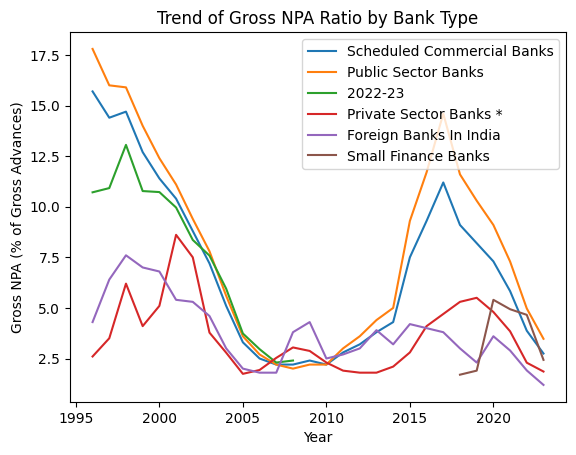

In [ ]:

# Trend Analysis: Gross NPA Ratio
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
for bank in master_df['Bank_Type'].unique():
    subset = master_df[master_df['Bank_Type'] == bank]
    plt.plot(subset['Year'], subset['Gross_NPA_pct_Gross_Adv'], label=bank)

plt.xlabel("Year")
plt.ylabel("Gross NPA (% of Gross Advances)")
plt.title("Trend of Gross NPA Ratio by Bank Type")
plt.legend()
plt.show()

Interpretation : 

Public Sector Banks consistently exhibit higher Gross NPAs
Private and Foreign Banks maintain lower and more stable NPAs
Small Finance Banks, appearing in later years, show moderate NPAs

The extremely high Gross NPA ratios in the late 1990s indicate a structurally weak banking system, poor credit appraisal, limited disclosure norms, and absence of proactive asset quality monitoring.

The steady decline during the 2000s reflects the impact of banking reforms such as prudential norms, improved supervision, adoption of technology, and gradual strengthening of credit risk management practices.

The decline in Gross NPAs after 2019 suggests successful balance-sheet clean-up

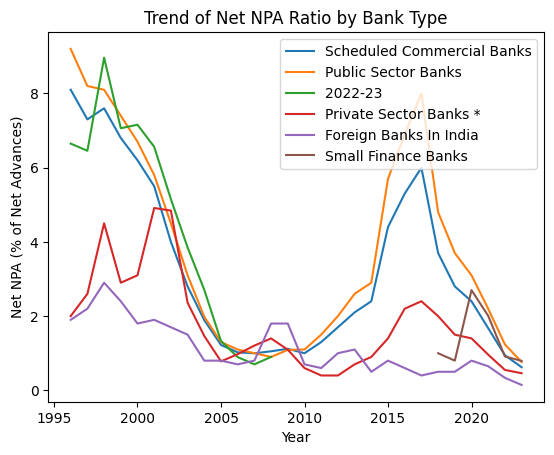

In [ ]:
# Trend Analysis: Net NPA Ratio
plt.figure()
for bank in master_df['Bank_Type'].unique():
    subset = master_df[master_df['Bank_Type'] == bank]
    plt.plot(subset['Year'], subset['Net_NPA_pct_Net_Adv'], label=bank)

plt.xlabel("Year")
plt.ylabel("Net NPA (% of Net Advances)")
plt.title("Trend of Net NPA Ratio by Bank Type")
plt.legend()
plt.show()

Interpretation : 

The gap between Gross and Net NPA trends highlights the growing role of provisioning as a risk-absorption mechanism in Indian banks.

Very high Net NPAs in the 1990s indicate inadequate provisioning and limited buffers against credit losses.

The sharp decline in Net NPAs during the 2000s shows that reforms not only reduced bad loans but also strengthened banks’ ability to absorb losses.and

During the 2015–2018 stress period, Net NPAs rose far less sharply than Gross NPAs, indicating improved provisioning discipline.DeprecationWarning

Public Sector Banks continue to show the highest Net NPAs
New Private Sector and Foreign Banks maintain consistently low Net NPAs
Small Finance Banks show moderate Net NPAs

Indian banks have become progressively better at absorbing credit losses, reducing systemic vulnerability over time.

In [ ]:
# Comparison of Gross vs Net NPAs

comparison_df = master_df.groupby('Bank_Type')[[
    'Gross_NPA_pct_Gross_Adv',
    'Net_NPA_pct_Net_Adv'
]].mean()

comparison_df

,Gross_NPA_pct_Gross_Adv,Net_NPA_pct_Net_Adv
Bank_Type,,
2022-23,7.650146,4.490781
Foreign Banks In India,3.796437,1.129724
Private Sector Banks *,3.621413,1.785831
Public Sector Banks,7.972908,3.816704
Scheduled Commercial Banks,6.941135,3.283848
Small Finance Banks,3.504369,1.368743


Key Observations

##### 1. Public Sector Banks

Highest average Gross NPA ratio (~8.0%) and Net NPA ratio (~3.8%).

Indicates persistent asset quality stress over the long term.

##### 2. Scheduled Commercial Banks (Overall)

Average NPAs remain elevated due to the dominant share of public sector banks in total lending.

##### 3. Old Private Sector Banks

Relatively high Gross (~6.3%) and Net (~3.6%) NPAs.

Reflect legacy loan portfolios and slower modernization compared to new private banks.

##### 4. New Private Sector Banks

Significantly lower average NPAs than public sector and old private banks.

Reflect stronger risk management, retail-focused lending, and faster stress recognition.

##### 5. Foreign Banks in India

Among the lowest Gross (~3.8%) and Net (~1.1%) NPAs.

Demonstrates highly selective lending, superior credit screening, and conservative exposure.

##### 6. Small Finance Banks

Moderate NPAs on average.

Reflect higher inherent credit risk in microfinance and small-ticket lending, but still well-managed compared to public sector banks.


#### Gross vs Net NPA Insight

Across all bank types, Net NPA ratios are substantially lower than Gross NPAs, indicating:

Improved provisioning practices

Better capital buffers

Enhanced regulatory oversight

The largest Gross–Net gap is observed in public sector banks, suggesting aggressive provisioning and recapitalization efforts in recent years.

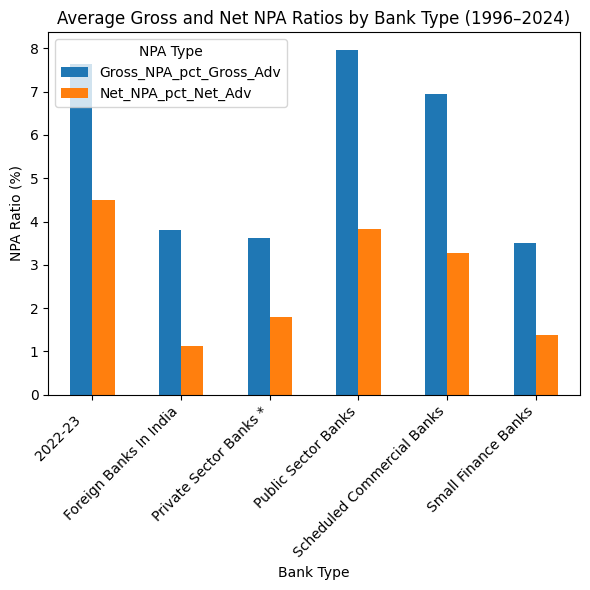

In [ ]:
# Bar Chart: Average Gross vs Net NPA Ratios by Bank Type
comparison_df.plot(kind="bar", figsize=(6, 6))

plt.title("Average Gross and Net NPA Ratios by Bank Type (1996–2024)")
plt.ylabel("NPA Ratio (%)")
plt.xlabel("Bank Type")
plt.xticks(rotation=45, ha="right")
plt.legend(title="NPA Type")
plt.tight_layout()
plt.show()


The bar chart compares average Gross and Net NPA ratios across different bank types over the period 1996–2024, highlighting structural differences in asset quality.

Key Insights from the Chart

1. Public Sector Banks

Highest bars for both Gross and Net NPAs.
Indicates sustained asset quality stress over time.
Reflects exposure to large corporate loans, infrastructure projects, and policy-driven lending.

2. Scheduled Commercial Banks (Overall)

Elevated averages due to the dominant weight of public sector banks.
Serves as a systemic benchmark for the Indian banking sector.

3. Old Private Sector Banks

NPAs lower than public sector banks but still relatively high.
Suggests legacy portfolios and slower transition to modern risk management systems.

4. New Private Sector Banks

Clearly lower Gross and Net NPA bars.
Reflect strong credit appraisal, retail-oriented lending, and faster stress recognition.

5. Foreign Banks in India

Among the lowest NPA ratios.
Demonstrates conservative lending practices and selective exposure to high-quality borrowers.

6. Small Finance Banks

Moderate NPA levels.
Higher inherent credit risk due to microfinance and small borrowers, but controlled through diversification and monitoring.

#### Gross vs Net NPA Contrast

Net NPAs are consistently lower than Gross NPAs across all bank types.

This gap highlights:

Improved provisioning norms
Regulatory tightening by RBI
Capital infusion and balance sheet cleanup, especially post-2018

Overall Interpretation:

The bar chart clearly illustrates a structural hierarchy in asset quality:
Public sector banks face persistent stress,
Private and foreign banks maintain superior asset quality,
Small finance banks occupy a middle ground.

#### Volatility Analysis of NPA Ratios

To understand the stability of asset quality over time, we measure the volatility of Gross and Net NPA ratios using standard deviation.
Higher volatility indicates greater sensitivity to economic and credit cycles.

In [ ]:
# Volatility (standard deviation) of NPA ratios by bank type
volatility_df = master_df.groupby("Bank_Type")[[
    "Gross_NPA_pct_Gross_Adv",
    "Net_NPA_pct_Net_Adv"
]].std()

volatility_df

NameError: name 'master_df' is not defined

#### Interpretation

1. Public Sector Banks

Highest volatility in Gross NPA ratios (~4.92).
Also very high volatility in Net NPAs.
Indicates strong exposure to economic shocks, delayed recognition of stress, and policy-driven lending.
Asset quality in PSBs is structurally unstable over long horizons.

2. Scheduled Commercial Banks (Overall System)

High volatility (~4.27 Gross).
This mirrors PSBs’ behavior because PSBs form a large share of the system.
Confirms that system-wide banking stress in India is PSB-driven.

3. Old Private Sector Banks

High volatility in both Gross and Net NPAs.
Reflects legacy balance sheets, regional concentration, and slower modernization.
Less resilient than new private banks, though better than PSBs.

4. New Private Sector Banks

Low to moderate volatility.
Shows stable asset quality management, diversified portfolios, and superior risk models.
Stress events impact them less severely and for shorter durations.

5. Foreign Banks in India

Very low volatility across both metrics.
Indicates tight credit selection, limited sectoral exposure, and conservative provisioning.
Their asset quality remains stable even during systemic stress periods.

6. Small Finance Banks

Low volatility, but interpretation needs caution.
Shorter data history (post-2015) reduces measured dispersion.
Despite serving riskier segments, volatility remains contained due to smaller scale and tighter monitoring.

#### Volatility analysis shows that Public Sector Banks have higher NPAs and are more unstable over time, while private and foreign banks have more stable and resilient asset quality.

## Structural Break Analysis: Public Sector Banks

Objective:  
To identify years where Gross NPA ratios for Public Sector Banks exhibit statistically significant regime shifts, indicating the onset or resolution of systemic stress.

In [12]:
psb_df = master_df[master_df["Bank_Type"] == "Public Sector Banks"].sort_values("Year")

psb_df[["Year", "Gross_NPA_pct_Gross_Adv"]].head()

NameError: name 'master_df' is not defined

### Visual Inspection of Structural Changes (Public Sector Banks)

Before applying statistical change-point detection, we first examine the time-series visually to identify periods where the NPA trend direction or slope changes significantly.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))

plt.plot(psb_df["Year"], psb_df["Gross_NPA_pct_Gross_Adv"])

plt.title("Public Sector Banks - Gross NPA Ratio Over Time")
plt.xlabel("Year")
plt.ylabel("Gross NPA %")

plt.grid(True)
plt.show()

### Statistical Change-Point Detection (Public Sector Banks)

To objectively validate visual regime shifts, we apply change-point detection on the Gross NPA ratio time series to identify statistically significant structural breaks.

In [ ]:
import ruptures as rpt
import numpy as np

# Prepare the signal
signal = psb_df["Gross_NPA_pct_Gross_Adv"].values

# Change-point detection using PELT (mean shift)
algo = rpt.Pelt(model="rbf").fit(signal)

# Detect breakpoints
breakpoints = algo.predict(pen=5)

breakpoints

In [ ]:
for pen in [1, 2, 3, 4, 5]:
    bkpts = rpt.Pelt(model="rbf").fit(signal).predict(pen=pen)
    print(f"Penalty {pen}: breakpoints -> {bkpts}")